<center><span style='font-size: 25px;'>СЕГМЕНТАЦИЯ КЛИЕНТОВ БАНКА</span></center>

<img src='data/pics/descr_1.png' width='70%' style='display:block; margin:auto;' />

<h2 id='contents'>Оглавляшка:</h2>

0. [Загружаемые библиотеки](#libs)

<center><span style="font-size:25px;">Практика по KMeans и EM-алгоритму</span></center> 

1. [Знакомство с данными](#intro)
2. [Совсем чуть чуть ЕДА и ФЕ](#edafe)
3. [Масштабирование StandardScaler](#scaling)

Кластеризация:

4. [Определение оптимального количества кластеров](#kmeansbysilhyet) `init='random'`
5. [Обучение KMeans о 3-х кластерах](#kmeansthreeclusters)
6. [Обучение DBSCAN с параметрами по умолчанию](#dbscandefault) тут важно, что `-1` - это не кластер, это шум.
7. [DBSCAN. Определение наилучших параметров](#dbscansearchparams) через коэффициент силуэта

Агломеративная:

8. [Агломеративная кластеризация. Определение наилучших параметров](#aglomerativesearchparams) 7.9 и 7.10 подбор и обучение.
9. [Визуализация кластеризации + вывод](#conclusion)

## Загружаемые библиотеки <a id='libs'></a>

In [1]:
from data.functions_akialema import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

## Знакомство с данными <a id='intro'></a>

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1gPH9BVp5fYgUoXJRfmzGZiyiUBoW2rDE')

df.columns = df.columns.str.lower()
my_info(df)

memory usage: 1.8 MB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,tenure,7,int64,12,8950,0,0,min...: 6.00max..: 12.00mean: 11.52std....: 1.34
1,balance_frequency,43,float64,1.0,8950,0,0,min...: 0.00max..: 1.00mean: 0.88std....: 0.24
2,oneoff_purchases_frequency,47,float64,0.0,8950,0,0,min...: 0.0max..: 1.0mean: 0.2std....: 0.3
3,prc_full_payment,47,float64,0.0,8950,0,0,min...: 0.00max..: 1.00mean: 0.15std....: 0.29
4,purchases_frequency,47,float64,1.0,8950,0,0,min...: 0.00max..: 1.00mean: 0.49std....: 0.40
5,purchases_installments_frequency,47,float64,0.0,8950,0,0,min...: 0.00max..: 1.00mean: 0.36std....: 0.40
6,cash_advance_frequency,54,float64,0.0,8950,0,0,min...: 0.00max..: 1.50mean: 0.14std....: 0.20
7,cash_advance_trx,65,int64,0,8950,0,0,min...: 0.00max..: 123.00mean: 3.25std....: 6.82
8,purchases_trx,173,int64,0,8950,0,0,min...: 0.00max..: 358.00mean: 14.71std....: 24.86
9,credit_limit,205,float64,3000.0,8950,1,0,min...: 50.00max..: 30000.00mean: 4494.45std....: 3638.82


[↑ contents](#contents)

<h2 id='edafe'>Немного ЕДЫ и ФЕ</h2>

In [3]:
good_print('Сколько всего пропусков в данных?', df.isna().sum().sum())

df = df.fillna(fillna_dict_for_custom_df(df, 'mean', roundnum=13))
good_print("Заполнить пропуски средним и посчитать среднее по 'minimum_payments'", f"{df['minimum_payments'].mean():.2f}")

df = df.drop(columns='cust_id', axis=1)

Сколько всего пропусков в данных?
--------------------------------
Ответ: 314

Заполнить пропуски средним и посчитать среднее по 'minimum_payments'
-------------------------------------------------------------------
Ответ: 864.21



[↑ contents](#contents)

<h2 id='scaling'>Масштабирование StandardScaler</h2>

Теперь нормализуйте данные с помощью `StandardScaler()`. Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (`X_norm[0][0]`). Округлите до двух знаков после точки-разделителя.

In [4]:
scaled_matrix = StandardScaler().fit_transform(df)

good_print("Вывести элемент [0][0]:", f"{scaled_matrix[0][0]:.2f}")

Вывести элемент [0][0]:
----------------------
Ответ: -0.73



[↑ contents](#contents)

<h2 id='kmeansbysilhyet'>Определение оптимального количества кластеров</h2>

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — `k-means`. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра `random_state` возьмём значение `42`.

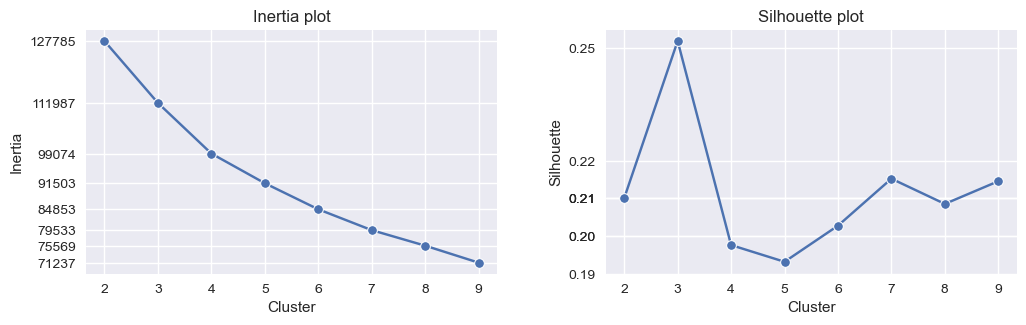

In [5]:
inertia_silhouette_plot(scaled_matrix, alg=KMeans(random_state=42, init='random', n_init='auto'), cluster_range=(2, 10), coef='i+s', figsize=(10, 3)).show('png')

[↑ contents](#contents)

<h2 id='kmeansthreeclusters'>Обучение KMeans о 3-х кластерах</h2>

Теперь реализуем непосредственно кластеризацию `k-means` с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [6]:
kmeans_7_6 = KMeans(n_clusters=3, init='random', n_init='auto', random_state=42)
kmeans_7_6.fit(scaled_matrix)

good_print("Сколько человек оказалось в самой малочисленной группе?", f"{pd.Series(kmeans_7_6.labels_).value_counts().min()}")

Сколько человек оказалось в самой малочисленной группе?
------------------------------------------------------
Ответ: 1252



[↑ contents](#contents)

<h2 id='dbscandefault'>Обучение DBSCAN с параметрами по умолчанию</h2>

Попробуем применить `DBSCAN`. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено? 

P.S. `-1` - это не кластер - это шум.

In [7]:
var_for_this_cell = pd.Series(DBSCAN().fit_predict(scaled_matrix)).value_counts().index
good_print("Сколько кластеров было выделено?", len(var_for_this_cell[var_for_this_cell >= 0]))

Сколько кластеров было выделено?
-------------------------------
Ответ: 38



[↑ contents](#contents)

<h2 id='dbscansearchparams'>DBSCAN. Определение наилучших параметров</h2>

В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма `DBSCAN`, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр `eps` по значениям, заданным как `np.arange(0.1, 3, 0.2)`, а параметр `min_samples` — по значениям, заданным как `range(1, 20, 4)`. Найдите комбинацию, которая даёт `максимальное` значение коэффициента силуэта.

In [24]:
eps = np.arange(0.1, 3, 0.2)
min_samples = np.arange(1, 20, 4)
searchlist = []

for i in eps:
    for j in min_samples:
        searchlist.append({'eps': i, 'min_samples': j, 'sil_score': silhouette_score(scaled_matrix, DBSCAN(eps=i, min_samples=j, n_jobs=-1).fit(scaled_matrix).labels_)})

good_print("Найти комбинацию, которая даёт максимальное значение коэффициента силуэта.", '')
pd.DataFrame(searchlist).sort_values(by='sil_score', ascending=False).head(1).round(2)

Найти комбинацию, которая даёт максимальное значение коэффициента силуэта.
-------------------------------------------------------------------------
Ответ: 



,eps,min_samples,sil_score
71,2.9,5,0.62


[↑ contents](#contents)

<h2 id='aglomerativesearchparams'>Агломеративная кластеризация. Определение наилучших параметров</h2>

Теперь давайте реализуем `агломеративную иерархическую кластеризацию`. Переберите `количество кластеров` в диапазоне от `3` до `9` включительно и найдите то их число, которое будет давать `максимальный` коэффициент силуэта.

In [25]:
cluster_range_for_aglo = np.arange(3, 10, 1)
searchlist_aglo = []

for i in cluster_range_for_aglo:
    searchlist_aglo.append({'n_clusters': i, 'sil_score': silhouette_score(scaled_matrix, AgglomerativeClustering(n_clusters=i).fit_predict(scaled_matrix))})
    
good_print("Скольким кластерам соответствует максимальный коэфф силуэта?", '')
pd.DataFrame(searchlist_aglo).sort_values(by='sil_score', ascending=False).head(1)

Скольким кластерам соответствует максимальный коэфф силуэта?
-----------------------------------------------------------
Ответ: 



,n_clusters,sil_score
3,6,0.173356


Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [27]:
good_print("Скольким будет наблюдений в самом многочисленном классе?", pd.Series(AgglomerativeClustering(n_clusters=6).fit(scaled_matrix).labels_).value_counts().max())

Скольким будет наблюдений в самом многочисленном классе?
-------------------------------------------------------
Ответ: 3946



[↑ contents](#contents)

<h2 id='conclusion'>Визуализация кластеризации + вывод</h2>

Давайте визуализируем результаты кластеризации `k-means`, отобразив два признака — `количество покупок` и `кредитный лимит`:

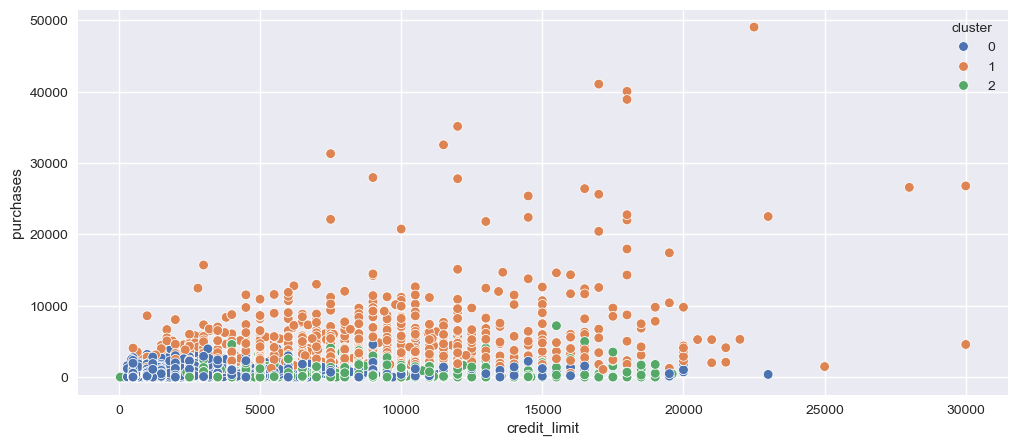

In [28]:
df_for_this_cell = pd.concat([df, pd.Series(kmeans_7_6.labels_, name='cluster')], axis=1)

fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=df_for_this_cell, y='purchases', x='credit_limit', hue='cluster', palette='deep')
plt.show('png')

Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.

[↑ contents](#contents)